# Creating a Neural Network From Scratch

## Creating neurons and batches

In [3]:
import numpy as np
#Input is as batches of 4
inputs = np.array([[1.0, 2.0, 3.0, 2.5], 
                   [2.0, 5.0, -10, 2.0],
                   [-1.5, 2.7, 3.3, -0.8]])
weights = [[0.2, 0.8, -0.5, 1.0],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, 3.0, 0.5]

layer_out = np.dot(inputs, np.array(weights).T) + biases
print(layer_out)

[[ 4.8    1.21   2.385]
 [13.4   -4.15  -1.33 ]
 [ 1.41   1.051  0.026]]


## Creating Dense Layers Using Multiple Neurons and Input Batches

To add a dense layer we need to take an input matrix, initialise a weight matrix according to the number of the in[uts and number of neurons.
Here, we’re setting weights to be random and biases to be 0. Note that we’re initializing weights to be (inputs, neurons), rather than (neurons, inputs). We’re doing this ahead instead of transposing every time we perform a forward pass. Initially we are choosing our bias as 0.

In [4]:
import nnfs
from nnfs.datasets import spiral_data

class DenseLayer:
    def __init__(self, n_inp, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inp, n_neurons)
        self.bias = np.zeros((1, n_neurons))
        
    def forward_pass(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.bias
        

## Adding necessary Activation Functions

### Rectified Linear Unit or ReLu Activation Function

ReLu functions return the number itself if the number is positive or zero otherwise.
The Graph of ReLu Function is given

Text(0, 0.5, 'ReLu')

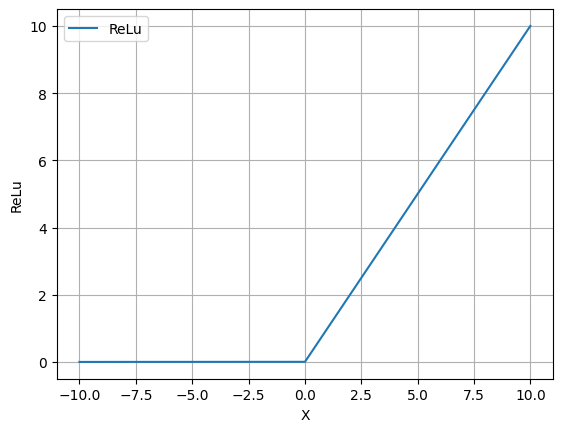

In [5]:
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 10000)
Y = np.maximum(0, X)

plt.plot(X, Y, label='ReLu')
plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('ReLu')

### Implementing Relu

In [6]:


nnfs.init()

class ReLu_Activation:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
       
       
#Importing Dataset to Test. 
X, y = spiral_data(samples=100, classes=3)

dense1 = DenseLayer(2, 3)

activation1 = ReLu_Activation()

dense1.forward_pass(X)

activation1.forward(dense1.output)

print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


### Softmax Activation

In SoftMax Activation Function we first exponentiate the outputs ( E ^ output_values). and then take a given exponentiated value and divide it by the sum of all of the exponentiated values in the output. Since each output value normalizes to a fraction of the sum, all the values are now in the range of 0 to 1 and add up to 1 — they share the probability of 1 between themselves.

In [7]:
class SoftMax_Activation:
    def forward(self, inputs):
        exp_val = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Here We are subtracting every value in input by the highest value in exp. This is to prevent the exponential function from overflowing
        #It doesn’t take a very large number, in this case, a mere 1,000, to cause an overflow error.
        self.output = exp_val / np.sum(exp_val, axis=1, keepdims=True)
        
#Testing on the previous data.

dense2 = DenseLayer(3,3)
activation2 = SoftMax_Activation()

dense2.forward_pass(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])


[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.33333364]
 [0.33333287 0.3333329  0.33333418]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]


## Adding Loss Function

In [8]:
#Crearting a common class Loss

class Loss:
    def calculate(self, output , y):
        sample_loss = self.forward(output, y)
        
        data_loss = np.mean(sample_loss)
        
        return data_loss

### Categorical Cross Entropy
 Used to Calculate loss in softmax outputs

In [9]:
class Loss_CategoricalCrossentropy(Loss):
    
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        
        #For categorical Labelling
        if len(y_true.shape) == 1:
            correct_conf = y_pred[range(samples), y_true]
        
        #For one-hot Encoding
        
        if len(y_true.shape) == 2:
            correct_conf = np.sum(y_pred * y_true, axis=1)
            
        negative_log_loss = -np.log(correct_conf)
        return negative_log_loss
        

Testing the code

In [18]:
loss_func = Loss_CategoricalCrossentropy()

loss = loss_func.calculate(activation2.output, y)

print("loss : ", loss)

loss :  1.0986104


#### Calculating Accuracy of the model

In [20]:
pred = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(pred==y)
print("Accuracy : ", accuracy)

Accuracy :  0.34


## Backward Pass / Backpropagation